# Weights initialization

### © Jubeen Shah 2018

Hola! Welcome to `jubeen-shah` jupyter notebooks for TensorFlow!

In this notebook, we'll see how to set up good initial weights for a neural network.

### Dataset

to see how different weights perform, we'll test these weights on the same dataset and neural networks. Let's start off with something very simple... what could be more simpler than [MNIST](https://en.wikipedia.org/wiki/MNIST_database) right?! 

We would first be importing all the required libraries and the helper.py notebook, which would basically abstract two functions.
 - The plotting of the validation accuracy
 - Calculation of the validation accuracy

In the `helper.py` notebook you can find the following functions defined:
 - `hist_dist()` : Display histogram of a TensorFlow distribution (random, normal, truncated normal) we'll be seeing these shortly
 - `_get_loss_acc()` : Get losses and validation accuracy of example neural network
     - This function is the implementation of a simple neural network, that would facillitate in finding the validation accuracy and loss, which we can then plot using `matplotlib` to compare with the different weight initializations we would be testing out.
 - `compare_init_weights()` : This function would help in plotting loss and print stats of weights using an example neural network

*You can go through the `helper.py` notebook first to get an understanding of the same :p*

In [5]:
%matplotlib inline 
#Provided you are running IPython, the %matplotlib inline will make your plot outputs appear and be stored within the notebook.

import tensorflow as tf
import helper

In [6]:
#let's now import the mnist data set

from tensorflow.examples.tutorials.mnist import input_data
print("Getting MNIST data from TensorFlow ....")
mnist = input_data.read_data_sets(".", one_hot=True)
print("Data Extracted... Awesome")

Getting MNIST data from TensorFlow ....
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting .\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting .\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Data Extracted... Awesome


### Neural Network
<img style="float: left" src="images/neural_network.png"/>

For the neural network, we would be using a three layer neural network, with the first layer converging the inputs to 256 units, the second layer converging to 128 neurons, and the final layer `output` layer having 10 neurons... basically the classes from `0-9`

In the cell below, let's just do exactly that... set up the shapes of each of the layer.

If you go through `helper.py`, you'll find that the neural network uses `ReLU` activations and an `Adam optimiser`.

In [7]:
layer_1_weight_shape = (mnist.train.images.shape[1], 256)
layer_2_weight_shape = (256, 128)
layer_3_weight_shape = (128, mnist.train.labels.shape[1])

## Initializing weights
Let's now start with what this notebook is really about, `weights initialization`

### All weights are same (0,1,2,3,4...)
Initially we might think that setting the weights to constant values would be the __Best Solution__, turns out it's the worst solution. We would eventually see a visualization of this, but let me tell you why...

With each of the weights being the same, all the neurons at each of the layer would be producing the same output. When this is the case, it becomes harder to decide which weights to adjust. 

Let's compare the loss with all ones and all zero weights using `helper.compare_init_weights`.  This function will run two different initial weights on the neural network above for 2 epochs.  It will plot the loss for the first 100 batches and print out stats after the 2 epochs (~860 batches).


Running the helper.py notebook... please wait!


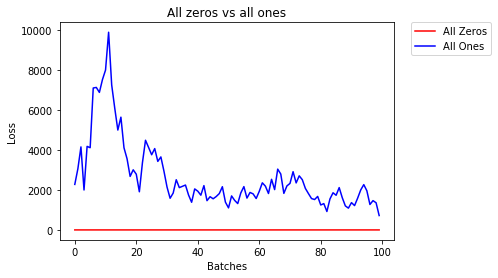

After 858 Batches (2 Epochs):
Validation Accuracy
   11.260% -- All Zeros
   10.020% -- All Ones
Loss
    2.306  -- All Zeros
  388.919  -- All Ones


In [8]:
all_zeros_weights = [
    tf.Variable(tf.zeros(layer_1_weight_shape)),
    tf.Variable(tf.zeros(layer_2_weight_shape)),
    tf.Variable(tf.zeros(layer_3_weight_shape))
]

all_ones_weights = [
    tf.Variable(tf.ones(layer_1_weight_shape)),
    tf.Variable(tf.ones(layer_2_weight_shape)),
    tf.Variable(tf.ones(layer_3_weight_shape))
]
print("Running the helper.py notebook... please wait!")
helper.compare_init_weights(
    mnist,
    'All zeros vs all ones', 
    [
        (all_zeros_weights, 'All Zeros'),
        (all_ones_weights, 'All Ones')])

As it can be seen, the accuracy is as good as randomly guessing the numbers... and you'll be right 1/10th of the time. 

A `good solution` is for getting random weights from a uniform distribution

### Uniform Distribution

Basically, in uniform distribution, the probability of choosing an number between [x,y] is the same. So the probability of choosing any number in range [1,100] is 0.01. The `TensorFlow` library provides a simple function to do just that 

`tf.random_uniform()` is function that would help us pick random numbers from uniform distribution.

Run the cell below, if you would like to read the documentation for `tf.random_uniform()`

In [9]:
??tf.random_uniform()

We can visualize, the values generated using the `hist_dist()` function from the helper.py file provided in the repo. Let's map 10,000 values between (-5,5) 

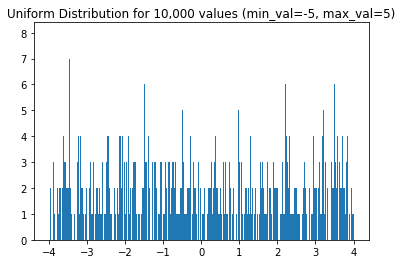

In [10]:
helper.hist_dist(title="Uniform Distribution for 10,000 values (min_val=-5, max_val=5)", 
                 distribution_tensor=tf.random_uniform([10000], minval=-5, maxval=5))

The histogram used 5000 buckets for the 10000 values.  Since the chance for any single bucket is the same, there should be around 2 values for each bucket. That's exactly what we see with the histogram.  Some buckets have more and some have less, but they trend around 2.

Now that we understand the `tf.random_uniform` function, let's apply it to some initial weights.

### Baseline

Let's see how well the neural network trains using the default values for `tf.random_uniform`, where `minval=0.0` and `maxval=1.0`.

Plotting the values... please wait!


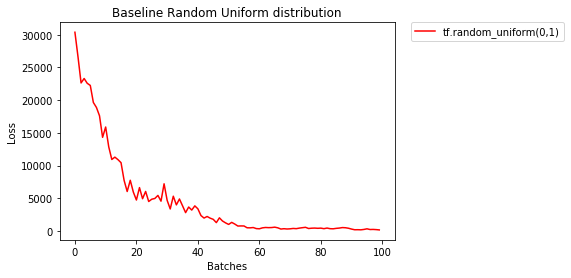

After 858 Batches (2 Epochs):
Validation Accuracy
   78.120% -- tf.random_uniform(0,1)
Loss
   21.794  -- tf.random_uniform(0,1)


In [11]:
baseline_weights = [
    tf.Variable(tf.random_uniform(shape=layer_1_weight_shape,minval=0, maxval=1)),
    tf.Variable(tf.random_uniform(shape=layer_2_weight_shape,minval=0, maxval=1)),
    tf.Variable(tf.random_uniform(shape=layer_3_weight_shape,minval=0, maxval=1))
]

print("Plotting the values... please wait!")
helper.compare_init_weights(
    weight_init_list=[(baseline_weights,'tf.random_uniform(0,1)')], 
    dataset=mnist, 
    title="Baseline Random Uniform distribution", )

Pretty good right? 78% accuracy, just by setting the weights randomly... however we can do much better... by setting the minval and maxval for the uniform distribution by following a general rule

### General rule for setting weights
The general rule for setting the weights in a neural network is to be close to zero without being too small. A good pracitce is to start your weights in the range of $[-y, y]$ where
$y=\frac{1}{\sqrt{n}}$ ($n$ is the number of inputs to a given neuron).

Let's see if this holds true, let's first center our range over zero.  This will give us the range [-1, 1).

The MNIST data is split into three parts: __55,000 data points__ of training data (mnist.train), 10,000 points of test data (mnist.test), and 5,000 points of validation data (mnist.validation). This split is very important: it's essential in machine learning that we have separate data which we don't learn from so that we can make sure that what we've learned actually generalizes!

As mentioned earlier, every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We'll call the images "x" and the labels "y". Both the training set and test set contain images and their corresponding labels; for example the training images are mnist.train.images and the training labels are mnist.train.labels.

Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:

In [12]:
import math

In [13]:
1 / math.sqrt(10000)

0.01

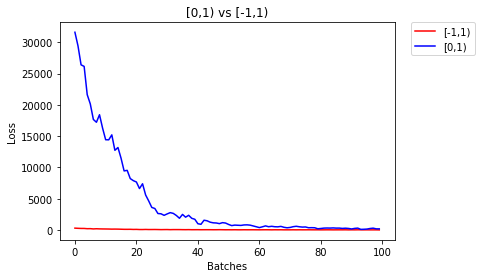

After 858 Batches (2 Epochs):
Validation Accuracy
   90.060% -- [-1,1)
   81.900% -- [0,1)
Loss
    9.177  -- [-1,1)
   11.951  -- [0,1)


In [14]:
uniform_minus1to1_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1, 1))
]

helper.compare_init_weights(dataset=mnist,title="[0,1) vs [-1,1)",
                            weight_init_list=[
                                (uniform_minus1to1_weights,'[-1,1)'),
                                (baseline_weights,'[0,1)')
                            ])

We're going in the right direction, the accuracy and loss is better with [-1, 1). We still want smaller weights. How far can we go before it's too small?

A boost from 78% previously to 90%, good right?

Smaller seems to be better... let's go even smaller

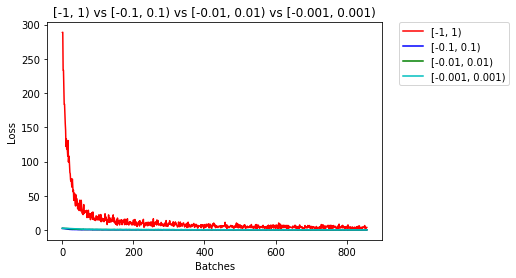

After 858 Batches (2 Epochs):
Validation Accuracy
   90.140% -- [-1, 1)
   97.080% -- [-0.1, 0.1)
   95.360% -- [-0.01, 0.01)
   94.520% -- [-0.001, 0.001)
Loss
    3.670  -- [-1, 1)
    0.036  -- [-0.1, 0.1)
    0.108  -- [-0.01, 0.01)
    0.170  -- [-0.001, 0.001)


In [15]:
uniform_neg01to01_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.1, 0.1))
]

uniform_neg001to001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.01, 0.01))
]

uniform_neg0001to0001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.001, 0.001))
]

helper.compare_init_weights(
    mnist,
    '[-1, 1) vs [-0.1, 0.1) vs [-0.01, 0.01) vs [-0.001, 0.001)',
    [
        (uniform_minus1to1_weights, '[-1, 1)'),
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (uniform_neg001to001_weights, '[-0.01, 0.01)'),
        (uniform_neg0001to0001_weights, '[-0.001, 0.001)')],
    plot_n_batches=None)

Looks like anything [-0.01, 0.01) or smaller is too small.  Let's compare this to our typical rule of using the range $y=1/\sqrt{n}$.

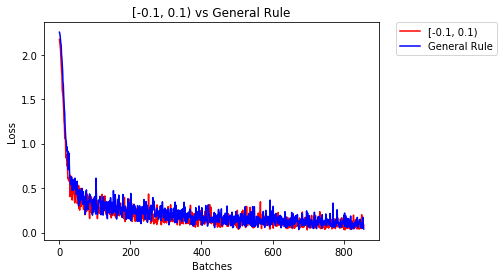

After 858 Batches (2 Epochs):
Validation Accuracy
   96.780% -- [-0.1, 0.1)
   96.780% -- General Rule
Loss
    0.083  -- [-0.1, 0.1)
    0.040  -- General Rule


In [16]:
import numpy as np

general_rule_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1/np.sqrt(layer_1_weight_shape[0]), 1/np.sqrt(layer_1_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1/np.sqrt(layer_2_weight_shape[0]), 1/np.sqrt(layer_2_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1/np.sqrt(layer_3_weight_shape[0]), 1/np.sqrt(layer_3_weight_shape[0])))
]

helper.compare_init_weights(
    mnist,
    '[-0.1, 0.1) vs General Rule',
    [
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (general_rule_weights, 'General Rule')],
    plot_n_batches=None)

The range we found and $y=1/\sqrt{n}$ are really close.

Since the uniform distribution has the same chance to pick anything in the range, what if we used a distribution that had a higher chance of picking numbers closer to 0.  Let's look at the normal distribution.
### Normal Distribution
Unlike the uniform distribution, the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) has a higher likelihood of picking number close to it's mean. To visualize it, let's plot values from TensorFlow's `tf.random_normal` function to a histogram.

>[tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/random_normal)

>Outputs random values from a normal distribution.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **mean:** A 0-D Tensor or Python value of type dtype. The mean of the normal distribution.
- **stddev:** A 0-D Tensor or Python value of type dtype. The standard deviation of the normal distribution.
- **dtype:** The type of the output.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

In [17]:
??tf.random_normal

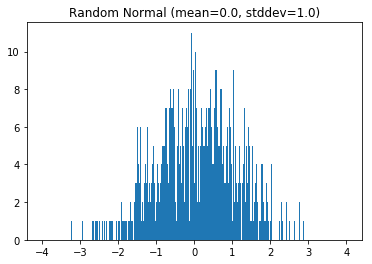

In [18]:
helper.hist_dist('Random Normal (mean=0.0, stddev=1.0)', tf.random_normal([1000]))

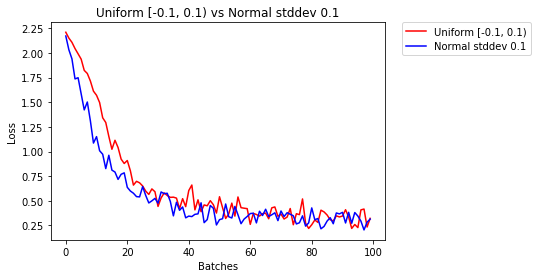

After 858 Batches (2 Epochs):
Validation Accuracy
   97.000% -- Uniform [-0.1, 0.1)
   97.420% -- Normal stddev 0.1
Loss
    0.177  -- Uniform [-0.1, 0.1)
    0.072  -- Normal stddev 0.1


In [19]:
normal_01_weights = [
    tf.Variable(tf.random_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Uniform [-0.1, 0.1) vs Normal stddev 0.1',
    [
        (uniform_neg01to01_weights, 'Uniform [-0.1, 0.1)'),
        (normal_01_weights, 'Normal stddev 0.1')])

The normal distribution gave a slight increasse in accuracy and loss.  Let's move closer to 0 and drop picked numbers that are `x` number of standard deviations away.  This distribution is called [Truncated Normal Distribution](https://en.wikipedia.org/wiki/Truncated_normal_distribution%29).
### Truncated Normal Distribution
>[tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/truncated_normal)

>Outputs random values from a truncated normal distribution.

>The generated values follow a normal distribution with specified mean and standard deviation, except that values whose magnitude is more than 2 standard deviations from the mean are dropped and re-picked.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **mean:** A 0-D Tensor or Python value of type dtype. The mean of the truncated normal distribution.
- **stddev:** A 0-D Tensor or Python value of type dtype. The standard deviation of the truncated normal distribution.
- **dtype:** The type of the output.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

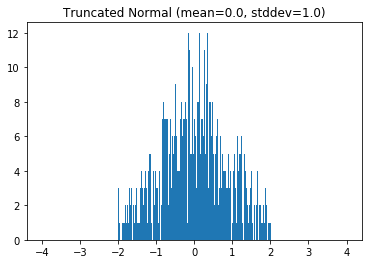

In [20]:
helper.hist_dist('Truncated Normal (mean=0.0, stddev=1.0)', tf.truncated_normal([1000]))

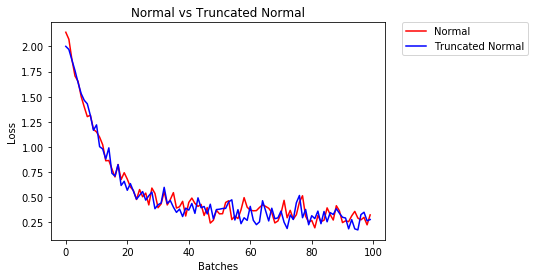

After 858 Batches (2 Epochs):
Validation Accuracy
   97.280% -- Normal
   96.760% -- Truncated Normal
Loss
    0.067  -- Normal
    0.110  -- Truncated Normal


In [21]:
trunc_normal_01_weights = [
    tf.Variable(tf.truncated_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Normal vs Truncated Normal',
    [
        (normal_01_weights, 'Normal'),
        (trunc_normal_01_weights, 'Truncated Normal')])

There's no difference between the two, but that's because the neural network we're using is too small. A larger neural network will pick more points on the normal distribution, increasing the likelihood it's choices are larger than 2 standard deviations.

We've come a long way from the first set of weights we tested. Let's see the difference between the weights we used then and now.

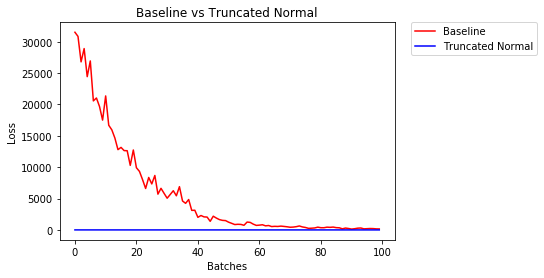

After 858 Batches (2 Epochs):
Validation Accuracy
   77.200% -- Baseline
   97.160% -- Truncated Normal
Loss
   14.650  -- Baseline
    0.066  -- Truncated Normal


In [23]:
helper.compare_init_weights(
    mnist,
    'Baseline vs Truncated Normal',
    [
        (baseline_weights, 'Baseline'),
        (trunc_normal_01_weights, 'Truncated Normal')])

That's a huge difference. You can barely see the truncated normal line. 

__Bueno Amigo__, that's the end of this notebook! we've come a long way. I hope we both could learn something from this notebook! ¡Adios, Amigo! Hasta pronto..

p.s -- learnig spanish. don't judge :P